# Functions


In [37]:
# %load ../../setup.py
"""
Packages for plotting and other stuff
version: 1.0
author: Riasat
"""
# %matplotlib widget

# data loading
import pandas as pd

# data maipulation
import pwlf
import numpy as np
from scipy.interpolate import interp1d, UnivariateSpline
from scipy.signal import find_peaks
from scipy import optimize

# plotting tools
import matplotlib.pyplot as plt

# extra tweaks
import warnings

warnings.filterwarnings("ignore")

# plot tweaks
plt.style.use("seaborn-poster")
pd.options.display.max_columns = None
pd.options.display.float_format = "{:.5f}".format

# function for extrapolation
def extrapolate1d(x, y):
    f = interp1d(x, y, kind="linear", fill_value="extrapolate")
    a = np.arange(0, x[len(x) - 1], 0.001)
    b = f(a)
    return a, b


# function for interpolation
def interpolate1d(x, y):
    f = interp1d(x, y, kind="linear", fill_value="extrapolate")
    a = np.arange(x[0], x[len(x) - 1], 0.001)
    b = f(a)
    return a, b


# function for interpolation
def interpolate2d(x, y):
    f = interp1d(x, y, kind="quadratic", fill_value="extrapolate")
    a = np.arange(x[0], x[len(x) - 1], 0.001)
    b = f(a)
    return a, b


# function for interpolation
def interpolate3d(x, y):
    f = interp1d(x, y, kind="cubic", fill_value="extrapolate")
    a = np.arange(x[0], x[len(x) - 1], 0.001)
    b = f(a)
    return a, b


# funciton for polynomial fitting
def polfit(a, b, c):
    z = np.polyfit(a, b, c)
    f = np.poly1d(z)

    x = np.arange(a[0], a[len(a) - 1], 0.001)
    y = f(x)
    return x, y


# function for picewise linear fit
def picewise_linear_fit(x, y, segments):
    my_pwlf = pwlf.PiecewiseLinFit(x, y)  # fit my data
    res = my_pwlf.fit(segments)  # fit the data for n line segments
    # slopes = myPWLF.calc_slopes()  # calculate slopes

    # predict for the determined points
    xHat = np.linspace(min(x), max(x), num=10000)
    yHat = my_pwlf.predict(xHat)

    # calculate statistics
    # p = myPWLF.p_values(method="non-linear", step_size=1e-4)  # p-values
    # se = myPWLF.se  # standard errors
    return xHat, yHat


# curve fit
def cur_fit(x, y):
    func = lambda t, a, c, d: a * np.log(t + c) + d
    popt, pcov = optimize.curve_fit(func, x, y)  # type: ignore
    xx = np.arange(x[0], x[len(x) - 1], 0.001)
    yy = func(xx, *popt)
    return xx, yy


# Importing Datas


In [38]:
# need to get the values of voltage and current
data_current = pd.read_excel("spark_data.xlsx", sheet_name="vol_current")
voltage_0 = data_current["voltage"]
current_0 = data_current["current"]

# voltage vs. counts
data_counts_1 = pd.read_excel("spark_data.xlsx", sheet_name="vol_count1")
voltage_1 = data_counts_1["voltage_d1"]
counts_1 = data_counts_1["counts_d1"]

data_counts_2 = pd.read_excel("spark_data.xlsx", sheet_name="vol_count2")
voltage_2 = data_counts_2["voltage_d2"]
counts_2 = data_counts_2["counts_d2"]

data_counts_3 = pd.read_excel("spark_data.xlsx", sheet_name="vol_count3")
voltage_3 = data_counts_3["voltage_d3"]
counts_3 = data_counts_3["counts_d3"]

# distance vs counts
data_distance = pd.read_excel("spark_data.xlsx", sheet_name="dist_count")
distance = data_distance["distance"]
counts = data_distance["counts"]

# Current characteristics


In [39]:
def curr(x,y):
	for i in range(len(x)):
		if (y[i] <= 4000):
			x_int, y_int = interpolate(x,y)
			return x_int, y_int
		else:
			x_int, y_int = polfit(x,y,1)
			return x_int, y_int

current_0_interpolated,voltage_0_interpolated = picewise_linear_fit(current_0, voltage_0,2)

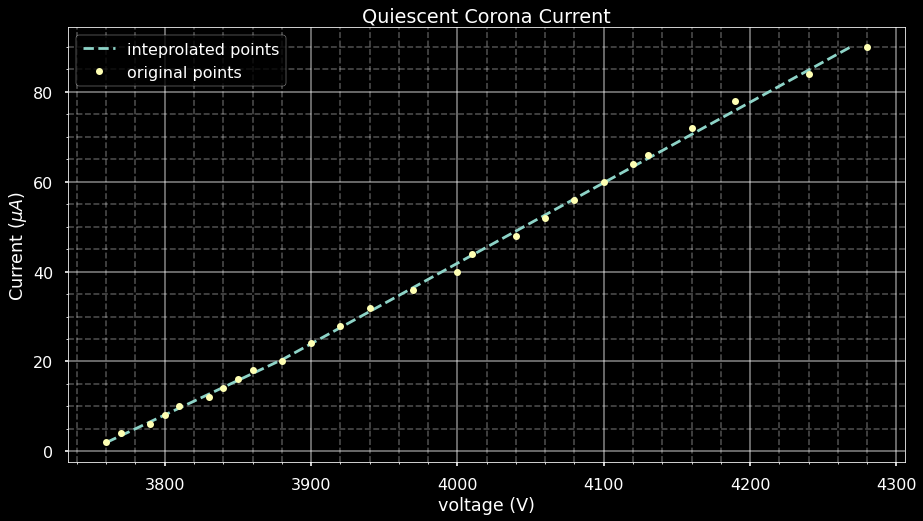

In [46]:
plt.style.use("seaborn-poster")
plt.figure(figsize=(15, 8))
plt.title(f"Quiescent Corona Current")
plt.xlabel("voltage (V)")
plt.ylabel(r"Current $\left(\mu A\right)$")

# ad, bd = [],[]
plt.plot(voltage_0_interpolated, current_0_interpolated, "--", label="inteprolated points")
# plt.plot(ad, bd, "--", label="fitted points")
plt.plot(voltage_0, current_0, "o", markersize=7, label=f"original points")

plt.legend(loc="upper left")
plt.grid(alpha=0.5, which="major")
plt.minorticks_on()
plt.grid(alpha=0.3, which="minor", ls="--")
plt.show()


# Voltage Characteristics


## interpolation

In [47]:
# original datas
voltage_orginal = [voltage_1, voltage_2, voltage_3]
counts_original = [counts_1, counts_2, counts_3]

# interpolation
voltage_interpolated_1, counts_interpolated_1 = picewise_linear_fit(voltage_1, counts_1, 3)
voltage_interpolated_2, counts_interpolated_2 = picewise_linear_fit(voltage_2, counts_2, 3)
voltage_interpolated_3, counts_interpolated_3 = picewise_linear_fit(voltage_3, counts_3, 3)

# order = 50
# voltage_interpolated_1, counts_interpolated_1 = polfit(voltage_1, counts_1, order)
# voltage_interpolated_2, counts_interpolated_2 = polfit(voltage_2, counts_2, order)
# voltage_interpolated_3, counts_interpolated_3 = polfit(voltage_3, counts_3, order)

# interpolated datas
voltage_interpolated = [voltage_interpolated_1, voltage_interpolated_2, voltage_interpolated_3]
counts_interpolated = [counts_interpolated_1, counts_interpolated_2, counts_interpolated_3]


## plot

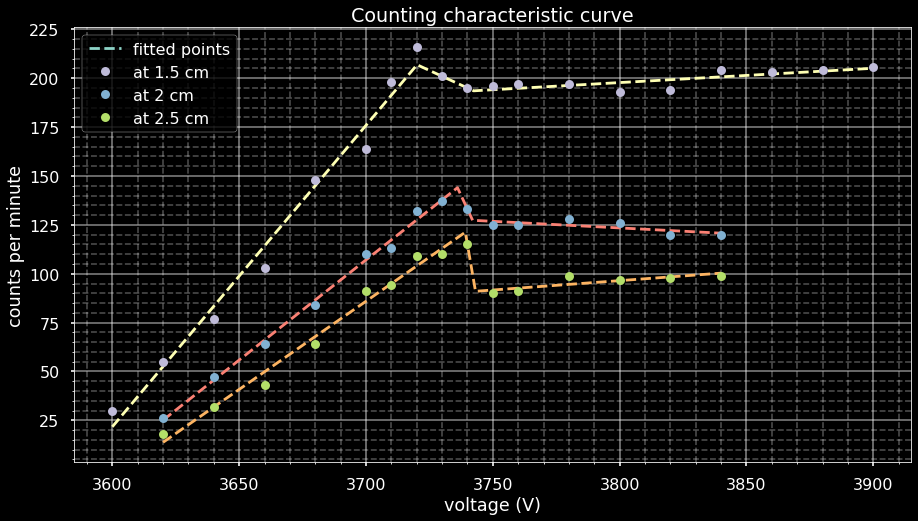

In [48]:
dilen = [1.5, 2, 2.5]

plt.style.use("seaborn-poster")
plt.figure(figsize=(15, 8))
plt.title(f"Counting characteristic curve")
plt.xlabel("voltage (V)")
plt.ylabel("counts per minute")
px,py = [],[]
plt.plot(px, py,"--", label ="fitted points")
for i in range(len(voltage_interpolated)):
    # px, py = segments_fit(voltage_interpolated[i], counts_interpolated[i], 3)
    # px,py = polfit(voltage_interpolated[i], counts_interpolated[i], 5)

    plt.plot(voltage_interpolated[i], counts_interpolated[i], "--")
    # pxint, pyint = polfit(px,py,4)

    # plt.plot(pxint, pyint, "--")
    plt.plot(
        voltage_orginal[i], counts_original[i], "o", markersize=9, label=f"at {dilen[i]} cm"
    )

plt.legend(loc="upper left")
plt.grid(alpha=0.5, which="major")
plt.minorticks_on()
plt.grid(alpha=0.3, which="minor", ls="--")
plt.show()


# Distance vs counts

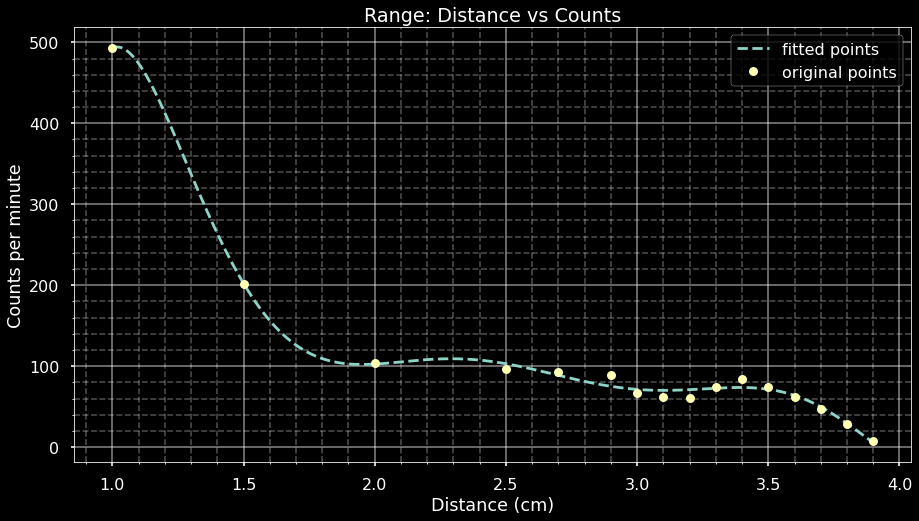

In [50]:
plt.style.use("seaborn-poster")
plt.figure(figsize=(15, 8))
plt.title(f"Range: Distance vs Counts")
plt.xlabel("Distance (cm)")
plt.ylabel(f"Counts per minute")

ad, bd = [],[]
ad, bd = polfit(distance, counts, 7)
plt.plot(ad, bd, "--", label="fitted points")
plt.plot(distance,counts, "o", markersize=9, label=f"original points")

plt.legend(loc="upper right")
plt.grid(alpha=0.5, which="major")
plt.minorticks_on()
plt.grid(alpha=0.3, which="minor", ls="--")
plt.show()